In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import Adam

# Exercise 1

In [2]:
def read_vocabulary(filename):
    with open(filename, 'r', encoding='ISO-8859-1') as f:
        lines = f.readlines()
        vocabulary = [line.strip() for line in lines]
        # Remove lines that start with ; or are empty or end with +
        vocabulary = [line for line in vocabulary if not line.startswith(';') and not line.endswith('+') and line]
    return vocabulary


negative_words = read_vocabulary('opinion-lexicon-English/negative-words.txt')
print(len(negative_words))

positive_words = read_vocabulary('opinion-lexicon-English/positive-words.txt')
print(len(positive_words))

4783
2005


In [3]:
def load_glove_embeddings(filename):
    embeddings = {}
    with open(filename, encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            embedding = np.array(values[1:], dtype=np.float32)
            embeddings[word] = embedding
    return embeddings

embeddings = load_glove_embeddings('glove.6B.50d.txt')

print(len(embeddings))

400000


In [8]:
positive_embeddings = np.array([embeddings[word] for word in positive_words if word in embeddings])
negative_embeddings = np.array([embeddings[word] for word in negative_words if word in embeddings])

positive_embeddings = positive_embeddings[:2005]
negative_embeddings = negative_embeddings[:2005]

# Create labels [0, 1] for positive embeddings and [1, 0] for negative embeddings
positive = np.array([0, 1])
negative = np.array([1, 0])
positive_labels = np.tile(positive, (positive_embeddings.shape[0], 1))
negative_labels = np.tile(negative, (negative_embeddings.shape[0], 1))

# Concatenate the embeddings
X = np.concatenate([positive_embeddings, negative_embeddings])
y = np.concatenate([positive_labels, negative_labels])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3118, 50), (3118, 2), (780, 50), (780, 2))

Epoch 1/20


2024-05-21 13:17:07.165245: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-05-21 13:17:07.236350: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


39/39 [==============================] - ETA: 0s - loss: 0.4773 - accuracy: 0.7735

2024-05-21 13:17:08.978373: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 3s 47ms/step - loss: 0.4773 - accuracy: 0.7735 - val_loss: 0.3357 - val_accuracy: 0.8558
Epoch 2/20
39/39 [==============================] - 1s 32ms/step - loss: 0.3614 - accuracy: 0.8472 - val_loss: 0.3345 - val_accuracy: 0.8558
Epoch 3/20
39/39 [==============================] - 1s 35ms/step - loss: 0.3590 - accuracy: 0.8428 - val_loss: 0.3354 - val_accuracy: 0.8590
Epoch 4/20
39/39 [==============================] - 1s 34ms/step - loss: 0.3525 - accuracy: 0.8520 - val_loss: 0.3354 - val_accuracy: 0.8606
Epoch 5/20
39/39 [==============================] - 1s 32ms/step - loss: 0.3561 - accuracy: 0.8460 - val_loss: 0.3364 - val_accuracy: 0.8542
Epoch 6/20
39/39 [==============================] - 1s 35ms/step - loss: 0.3562 - accuracy: 0.8460 - val_loss: 0.3336 - val_accuracy: 0.8574
Epoch 7/20
39/39 [==============================] - 1s 36ms/step - loss: 0.3457 - accuracy: 0.8460 - val_loss: 0.3292 - val_accuracy: 0.8670
Epoch 8/20
39/39 [======

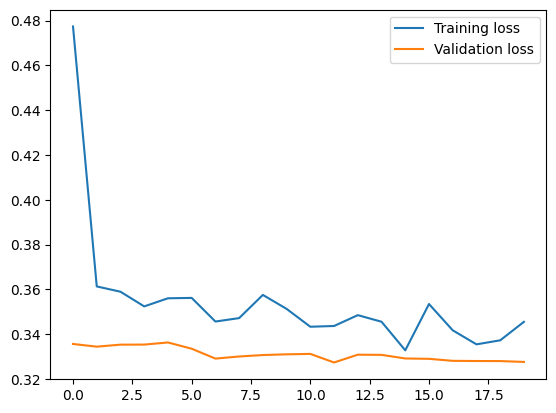

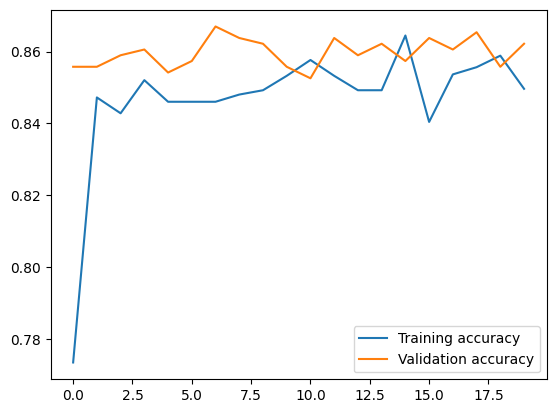

In [14]:
# Create a model
model = Sequential()
model.add(Dense(128, input_dim=50, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.00001), metrics=['accuracy'])

# Train the model
log = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

# Plot the training history (loss and accuracy)
plt.plot(log.history['loss'], label='Training loss')
plt.plot(log.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

plt.plot(log.history['accuracy'], label='Training accuracy')
plt.plot(log.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.show()

In [17]:
# Test the model on some words that are not in the training set
words = ['hello', 'horse', 'moon', 'sun', 'war', 'computer', 'machine']

for word in words:
    if word in embeddings:
        embedding = embeddings[word].reshape(1, -1)
        prediction = model.predict(embedding)
        print(f'{word}: {prediction}')
    else:
        print(f'{word} is not in the vocabulary')

1/1 [==============================] - 0s 30ms/step
hello: [[0.1942588 0.8057412]]
1/1 [==============================] - 0s 31ms/step
horse: [[0.10795947 0.8920405 ]]
1/1 [==============================] - 0s 32ms/step
moon: [[0.02445367 0.97554636]]
1/1 [==============================] - 0s 30ms/step
sun: [[0.06360759 0.9363924 ]]
1/1 [==============================] - 0s 32ms/step
war: [[0.8958378  0.10416224]]
1/1 [==============================] - 0s 35ms/step
computer: [[0.06337096 0.93662906]]
1/1 [==============================] - 0s 31ms/step
machine: [[0.5976459 0.4023541]]
